MNIST 데이터 불러온 후, 스케일링 후 Train, Validation Set으로 분할

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) #이미지에는 항상 깊이(채널)이 있어야 한다. 흑백의 이미지는 채널이 없는 2차원이지만, 다른 이미지는 채널이 RGB로 이루어짐.
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

### 첫 번째 합성곱-풀링 층 신경망

In [2]:
model = keras.Sequential()

#32개의 kernel, Same Padding, kernel_size = (3, 3)
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [3]:
#풀링 층 추가. 전형적인 (2, 2) 크기의 풀링
#Pooling Layer을 통과하면 데이터는 (28, 28, 32)에서 (14, 14, 32)가 된다.
model.add(keras.layers.MaxPooling2D(2))

### 두 번째 합성곱-풀링 층 신경망

In [4]:
#64개의 kernel, 3종류의 kernel
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

최종적으로 만들어지는 피처맵의 크기는 (7, 7, 64)

In [5]:
#Flatten layer, Dense layer 추가, hidden layer와 output layer 사이의 Dropout 추가. 
#패션 MNIST  데이터셋은 클래스 10개를 분류하는 다중 분류이므로 마지막층 뉴런은 10개, 활성화함수는 softmax
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax')) #output layer, activate function은 softmax 

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

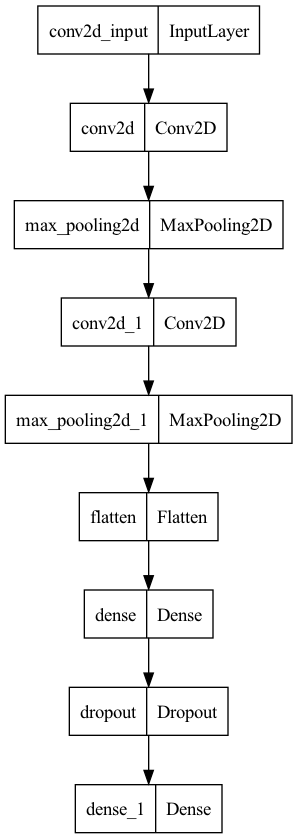

In [7]:
keras.utils.plot_model(model)

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5223 - accuracy: 0.8124 - val_loss: 0.3402 - val_accuracy: 0.8752
Epoch 2/20
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3504 - accuracy: 0.8737 - val_loss: 0.3050 - val_accuracy: 0.8863
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2981 - accuracy: 0.8925 - val_loss: 0.2612 - val_accuracy: 0.9024
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2670 - accuracy: 0.9030 - val_loss: 0.2564 - val_accuracy: 0.9058
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2398 - accuracy: 0.9130 - val_loss: 0.2399 - val_accuracy: 0.9126
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2237 - accuracy: 0.9181 - val_loss: 0.2280 - val_accuracy: 0.9158
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2052 - accuracy: 0.9240 - val_loss: 0.2430 -

In [10]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.2230 - accuracy: 0.9212


[0.22298048436641693, 0.9212499856948853]

In [12]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 45ms/step
[[2.8726700e-20 5.2744390e-30 1.1897561e-22 1.9612064e-25 1.8187563e-21
  2.3631663e-19 4.3168609e-22 1.1876107e-23 1.0000000e+00 1.5984584e-23]]


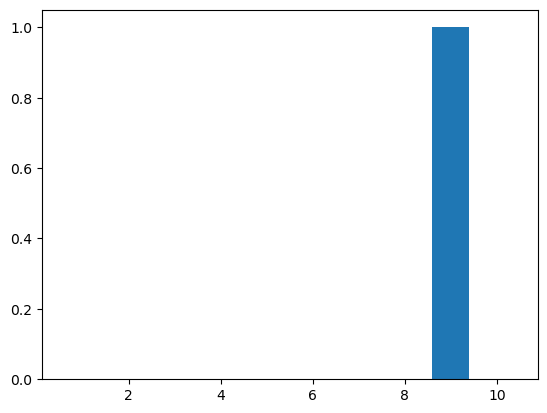

In [15]:
import matplotlib.pyplot as plt

plt.bar(range(1, 11), preds[0])
plt.show()

In [16]:
test_input.shape

(10000, 28, 28)

In [17]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2489 - accuracy: 0.9132


[0.24890126287937164, 0.9132000207901001]